In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re

In [2]:
Tweets= pd.read_csv("Tweets.csv")
Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [3]:
Tweets.airline.describe()

count      14640
unique         6
top       United
freq        3822
Name: airline, dtype: object

In [4]:
Tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

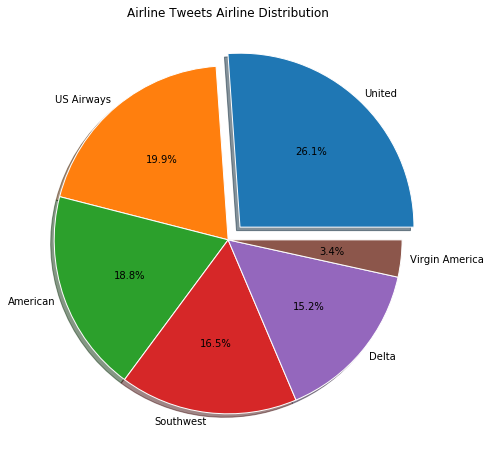

In [5]:
airline_counts = Tweets['airline'].value_counts()
labels = [0]*len(airline_counts)
for i in range(len(airline_counts)): labels[i] = airline_counts.index[i]
explode = (0.1, 0, 0, 0, 0, 0)   

fig1 = plt.figure(figsize=[8, 8])
ax1 = fig1.add_subplot(111)

pie_wedge_collection = ax1.pie(airline_counts, explode=explode, labels=labels, labeldistance=1.05, autopct='%1.1f%%',
                              shadow=True);

for pie_wedge in pie_wedge_collection[0]: pie_wedge.set_edgecolor('white')

ax1.set_title("Airline Tweets Airline Distribution");
plt.show()


In [6]:
Tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

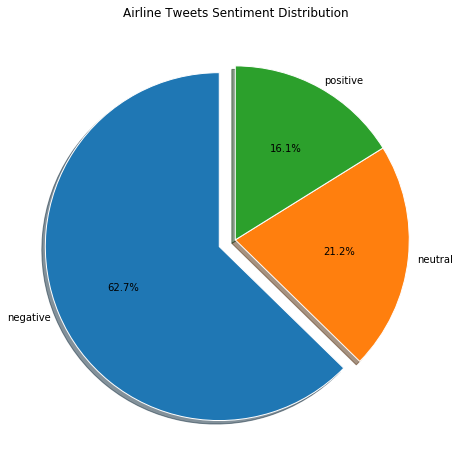

In [7]:
sentiment_counts = Tweets.airline_sentiment.value_counts()
labels = [0]*len(sentiment_counts)
for i in range(len(sentiment_counts)): labels[i] = sentiment_counts.index[i]
explode = (0.1, 0, 0)  

fig1 = plt.figure(figsize=[8, 8])
ax1 = fig1.add_subplot(111)

pie_wedge_collection = ax1.pie(sentiment_counts, explode=explode, labels=labels, labeldistance=1.05, autopct='%1.1f%%',
                               shadow=True, startangle=90);
for pie_wedge in pie_wedge_collection[0]: pie_wedge.set_edgecolor('white')

ax1.set_title("Airline Tweets Sentiment Distribution");
plt.show()


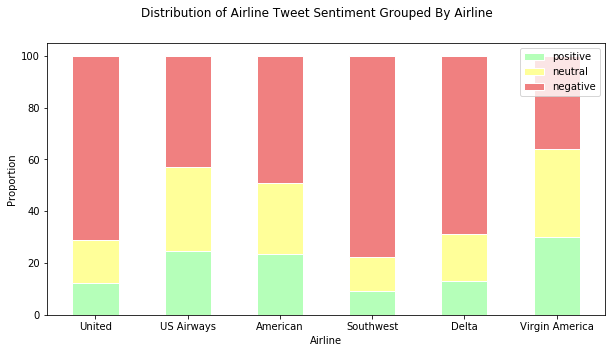

In [8]:
# Data
r = [0,1,2,3,4,5]
sentiments = ["positive", "neutral", "negative"]
positiveProps = (Tweets[Tweets.airline_sentiment == 'positive'].groupby(['airline']).count()[['airline_sentiment']]/ Tweets.groupby(['airline']).count()[['airline_sentiment']])*100
neutralProps = (Tweets[Tweets.airline_sentiment == 'neutral'].groupby(['airline']).count()[['airline_sentiment']]/ Tweets.groupby(['airline']).count()[['airline_sentiment']])*100
negativeProps = (Tweets[Tweets.airline_sentiment == 'negative'].groupby(['airline']).count()[['airline_sentiment']]/ Tweets.groupby(['airline']).count()[['airline_sentiment']])*100
 
positiveProps = positiveProps['airline_sentiment'].tolist()
neutralProps = neutralProps['airline_sentiment'].tolist()
negativeProps = negativeProps['airline_sentiment'].tolist()
plt.figure(figsize=[10, 5])
barWidth = 0.5
labels = 'United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America'
plt.bar(r,positiveProps, color='#b5ffb9', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps, bottom=positiveProps, color='#FFFF99', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='#F08080', edgecolor='white', width=barWidth)
 
plt.xticks(r, labels)
plt.suptitle('Distribution of Airline Tweet Sentiment Grouped By Airline')
plt.xlabel("Airline")
plt.ylabel("Proportion")
plt.legend(sentiments)
plt.show()


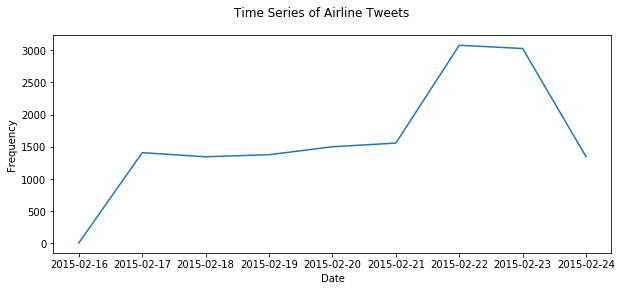

In [9]:
least_recent_date = Tweets['tweet_created'].min()[0:10]
recent_date = Tweets['tweet_created'].max()[0:10]

days_elapsed = int(recent_date[2:4]) - int(least_recent_date[2:4])

x = np.array([datetime.date(2015, 2, i) for i in range(16,25)])

y = [0]* (days_elapsed+1)
y
for i in range(len(Tweets)):
    y[int(re.findall('\d+', Tweets['tweet_created'][i][2:4])[0]) - 16] +=1

plt.figure(figsize=(10,4))
plt.suptitle('Time Series of Airline Tweets ')
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.plot(x,y)
plt.show()

In [10]:
multiTS = Tweets[["tweet_created","airline"]]
dates = ["2/16/15","2/17/15","2/18/15","2/19/15","2/20/15","2/21/15","2/22/15","2/23/15","2/24/15"]

d = {'dates' : dates, 'United' : [0]*9 , 'US Airways': [0]*9, 'American': [0]*9, 'Southwest': [0]*9, 'Delta': [0]*9, 'Virgin America': [0]*9}
df = pd.DataFrame(data=d)

for i in range(len(multiTS.index)):
    df.loc[int(multiTS["tweet_created"][i][2:4]) - 16, multiTS["airline"][i]] += 1
df

,dates,United,US Airways,American,Southwest,Delta,Virgin America
0,2/16/15,2,0,0,0,2,0
1,2/17/15,396,311,0,384,263,54
2,2/18/15,406,317,1,292,268,60
3,2/19/15,426,279,1,317,283,70
4,2/20/15,526,333,1,319,251,70
5,2/21/15,506,360,1,370,243,77
6,2/22/15,703,648,988,279,408,53
7,2/23/15,641,488,1141,276,391,91
8,2/24/15,216,177,626,183,113,29


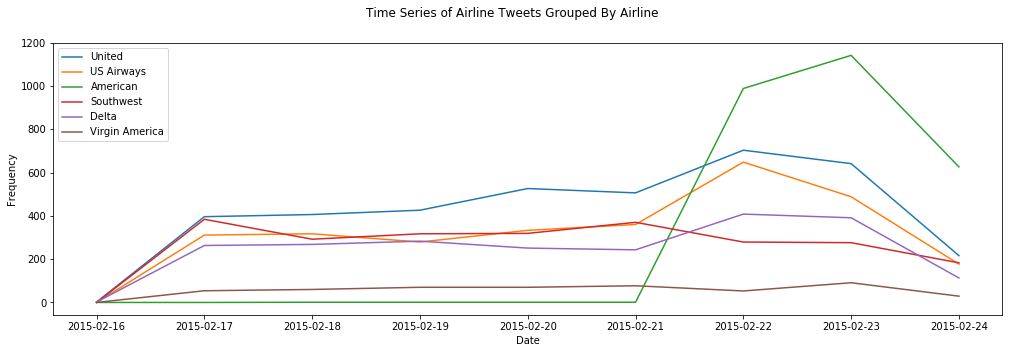

In [11]:
plt.figure(figsize=(17,5))
plt.suptitle('Time Series of Airline Tweets Grouped By Airline')
plt.xlabel("Date")
plt.ylabel("Frequency")
for i in range(len(labels)): plt.plot(x,df[labels[i]].tolist())
plt.legend(labels)
plt.show()

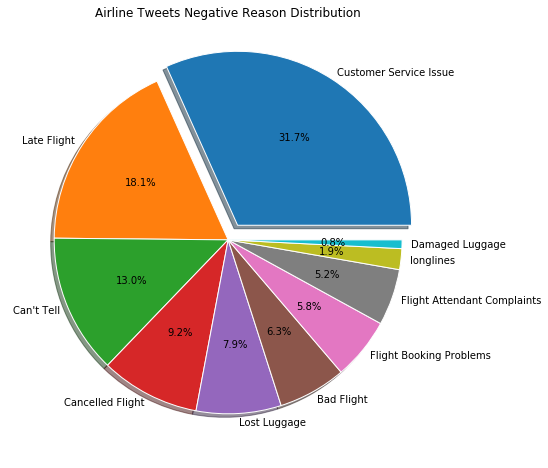

In [12]:
negreason_counts = Tweets['negativereason'].value_counts()
labels = [0]*len(negreason_counts)
for i in range(len(negreason_counts)): labels[i] = negreason_counts.index[i]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  

fig1 = plt.figure(figsize=[8, 8])
ax1 = fig1.add_subplot(111)

pie_wedge_collection = ax1.pie(negreason_counts, explode=explode, labels=labels, labeldistance=1.05, autopct='%1.1f%%',
                              shadow = True);

for pie_wedge in pie_wedge_collection[0]: pie_wedge.set_edgecolor('white')

ax1.set_title("Airline Tweets Negative Reason Distribution");
plt.show()

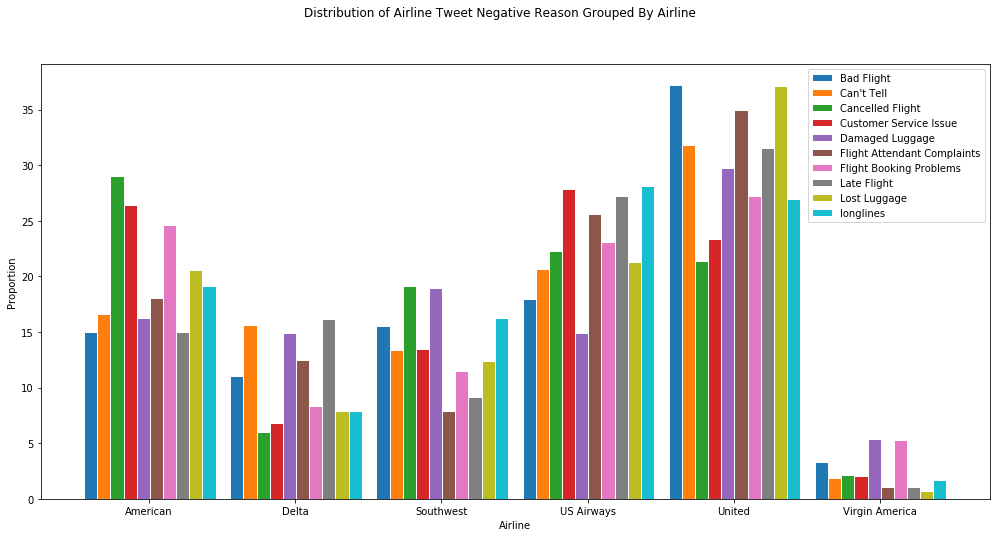

In [13]:
negreasongrouped = Tweets.groupby(['negativereason', 'airline'])['negativereason'].count() / Tweets.groupby(['negativereason'])['negativereason'].count() * 100
airlines = [0]*6
negreasons = [0] * 10
for i in range(6): airlines[i] = negreasongrouped.index[i][1]
for i in range(10): negreasons[i] = negreasongrouped.index[i*6][0]
plt.figure(figsize=[17, 8])
ind = np.arange(6)
barWidth = 0.09
for i in range(len(negreasons)):
    plt.bar(ind-.4 + i*barWidth, negreasongrouped[negreasons[i]].tolist(), edgecolor='white', width=barWidth, )
    
    
plt.xticks(r, airlines)
plt.suptitle('Distribution of Airline Tweet Negative Reason Grouped By Airline')
plt.xlabel("Airline")
plt.ylabel("Proportion")
plt.legend(negreasons)
plt.show()

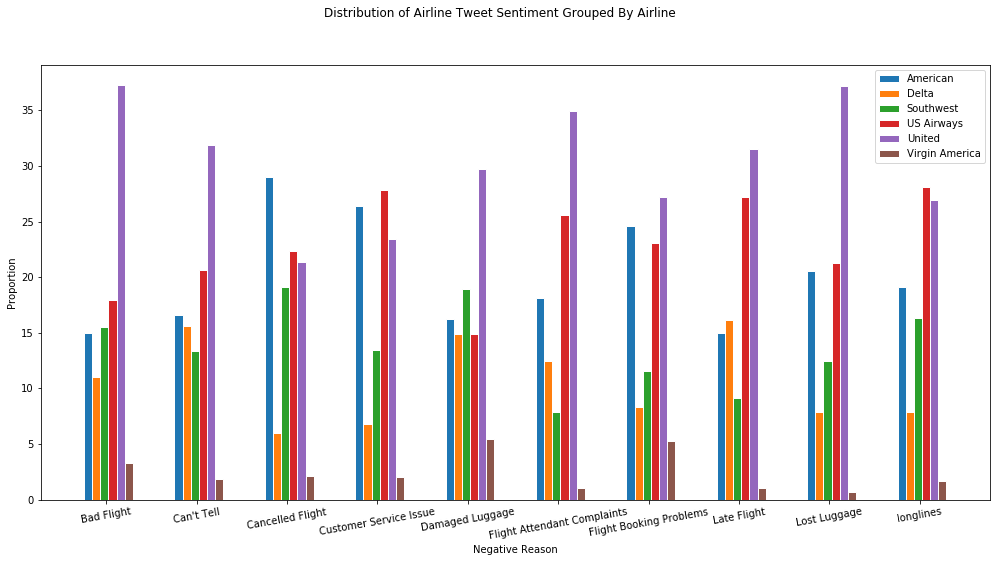

In [14]:
negreasongrouped = Tweets.groupby(['airline','negativereason'])['negativereason'].count() / Tweets.groupby(['negativereason'])['negativereason'].count() * 100
airlines = [0]*6
negreasons = [0] * 10
for i in range(6): airlines[i] = negreasongrouped.index[i*10][0]
for i in range(10): negreasons[i] = negreasongrouped.index[i][1]
plt.figure(figsize=[17, 8])
ind = np.arange(10)
barWidth = 0.09
for i in range(len(airlines)):
    plt.bar(ind-.2 + i*barWidth, negreasongrouped[airlines[i]].tolist(), edgecolor='white', width=barWidth, )
    
    
plt.xticks(ind, negreasons, rotation=10)

plt.suptitle('Distribution of Airline Tweet Sentiment Grouped By Airline')
plt.xlabel("Negative Reason")
plt.ylabel("Proportion")
plt.legend(airlines)
plt.show()

In [15]:
tweetlocations = Tweets['tweet_location'].value_counts()
tweetlocations = tweetlocations[tweetlocations>30]
tweetlocations

Boston, MA                     157
New York, NY                   156
Washington, DC                 150
New York                       127
USA                            126
Chicago                        104
Los Angeles, CA                 96
New York City                   96
NYC                             95
San Francisco, CA               91
San Francisco                   86
Chicago, IL                     81
Brooklyn, NY                    66
Los Angeles                     64
Austin, TX                      64
Washington, D.C.                63
Boston                          62
Dallas, TX                      54
Washington DC                   53
Nashville, TN                   45
NY                              42
Texas                           42
Philadelphia, PA                38
San Diego                       38
Denver, CO                      37
Houston, TX                     35
Seattle                         34
Global                          34
Logan International 

In [16]:
negreasongrouped

airline         negativereason             
American        Bad Flight                     15.000000
                Can't Tell                     16.638655
                Cancelled Flight               29.043684
                Customer Service Issue         26.391753
                Damaged Luggage                16.216216
                Flight Attendant Complaints    18.087318
                Flight Booking Problems        24.574669
                Late Flight                    14.954955
                Lost Luggage                   20.580110
                longlines                      19.101124
Delta           Bad Flight                     11.034483
                Can't Tell                     15.630252
                Cancelled Flight                6.021251
                Customer Service Issue          6.838488
                Damaged Luggage                14.864865
                Flight Attendant Complaints    12.474012
                Flight Booking Problems     